<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/CArs_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("Car_sales.csv", index_col=0)
df.head()





Saving Car_sales.csv to Car_sales (1).csv


,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,,,,,,,,,,,,,,,
Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [77]:
def normalize(d): # a trick we need later to make numerical sense of things
  low = min(d)
  high = max(d)
  span = high - low
  return [ (value - low) / span for value in d]


In [79]:
n = 100

import pandas as pd
from random import randint


p = [ randint(5000, 50000) for car in range(n) ]
price = pd.Series(p, name = 'Price_in_thousands')
nprice = pd.Series(normalize(p), name = 'NPrice')

hp = [ randint(100, 500) for car in range(n) ]
horsepower = pd.Series(hp, name='Horsepower')
nhorsepower = pd.Series(normalize(p), name = 'NHorsepower')

L = [ randint(2000, 2024) for car in range(n) ]
Latest = pd.Series(L, name = 'Latest_Launch')
nLatest = pd.Series(normalize(p), name = 'NLatest')

m2 = [randint(10, 100) for car in range(n)]
mpg = pd.Series(m2, name='Fuel_efficiency')
nmpg = pd.Series(normalize(p), name = 'NFuel_efficiency')

attribute = [  price, Latest, horsepower, mpg ]
cars = pd.concat(attribute, axis = 1)
cars.head()

,Price_in_thousands,Latest_Launch,Horsepower,Fuel_efficiency
0,44732,2001,382,34
1,43535,2000,299,67
2,40144,2013,223,92
3,44973,2008,238,76
4,42559,2002,484,95


In [80]:
ideal = {
  'Price_in_thousands' : 1, # minimize
  'Fuel_efficiency' : -1, # maximize (minimize the negative)
  'Latest_Launch' : 1,
  'NLatest_Launch' : 1,
  'NPrice' : 1, # minimize
  'Horsepower' : 1, # also minimize
  'NFuel_efficiency' : -1, # maximize (minimize the negative)
  'NHorsepower' : 1
  }

multipliers = [ ideal[c] for c in cars.columns ]
multipliers

[1, 1, 1, -1]

In [81]:
def dominates(challenger, challenged): # smaller is better
  if all(v <= w for v, w in zip(challenger, challenged)): # if all aspects are at least as good
    return any( v < w for v, w in zip(challenger, challenged)) # and at least one is actually better
  return False
x = [ 1, 2, 3 ]
y = [ 0, 1, 2 ]
z = [ 1, 4, 3 ]

print('x vs. y', dominates(x, y))
print('y vs. x', dominates(y, x))
print('x vs. z', dominates(x, z))
print('z vs. x', dominates(z, x))
print('z vs. y', dominates(z, y))
print('y vs. z', dominates(y, z))
nondominated = set()

for i, data in cars.iterrows():
  car = [ m * v for m, v in zip(multipliers, data) ]
  discard = False # assume it to be invincible
  for j in range(i + 1, n): # check all the other cars
    otherData = cars.iloc[j] # get their data
    alt = [ m * v for m, v in zip(multipliers, otherData) ]
    if dominates(alt, car): # challenge the car with the alternative
      discard = True # we will not want to consider the loser
      break # no need to check further, it was already beaten
  if not discard: # nothing beat it
    nondominated.add(i) # remember the row

len(nondominated)
keep = sorted(list(nondominated))
candidates = cars.iloc[keep]
candidates

x vs. y False
y vs. x True
x vs. z True
z vs. x False
z vs. y False
y vs. z True


,Price_in_thousands,Latest_Launch,Horsepower,Fuel_efficiency
2,40144,2013,223,92
4,42559,2002,484,95
5,40919,2001,374,91
6,24736,2000,498,27
7,39857,2000,153,82
9,19120,2016,222,14
11,19427,2016,120,26
12,22118,2008,346,70
14,12148,2014,342,74
15,18760,2004,385,30


In [98]:
import numpy as np
import numpy as np
power = 100
budget = 50000
consider = candidates[ (candidates['Horsepower'] >= power) & (candidates['Price_in_thousands'] <= budget) ]
consider
importance = { 'Least_launch': 0.30, 'NFuel_efficiency': 0.30, 'Horsepower': 0.15,  'NPrice': 0.15 }
sum(importance.values())
attr = ideal.keys()
factor = [ importance.get(a, 0) * ideal[a] for a in attr ]
factor
compromise = []
for i, data in consider.iterrows():
  combo = sum( [ f * d for f, d in zip(factor, data) ])
  compromise.append(combo)
cand = consider.copy()
l = 'Combination'
cand[l] = compromise
inOrder = cand.sort_values(by = [l])
inOrder.head(10)


,Price_in_thousands,Latest_Launch,Horsepower,Fuel_efficiency,Combination
2,40144,2013,223,92,0
71,20594,2007,158,30,0
72,30961,2011,152,90,0
73,5078,2016,319,56,0
74,34546,2004,385,61,0
75,5096,2012,335,46,0
76,13047,2009,296,95,0
77,34896,2016,369,86,0
78,23173,2018,247,96,0
79,26785,2012,199,40,0


In [99]:
vars = ['Latest_Launch', 'Fuel_efficiency', 'Horsepower']
threedim = cand[vars]
threedim.head()

,Latest_Launch,Fuel_efficiency,Horsepower
2,2013,92,223
4,2002,95,484
5,2001,91,374
6,2000,27,498
7,2000,82,153


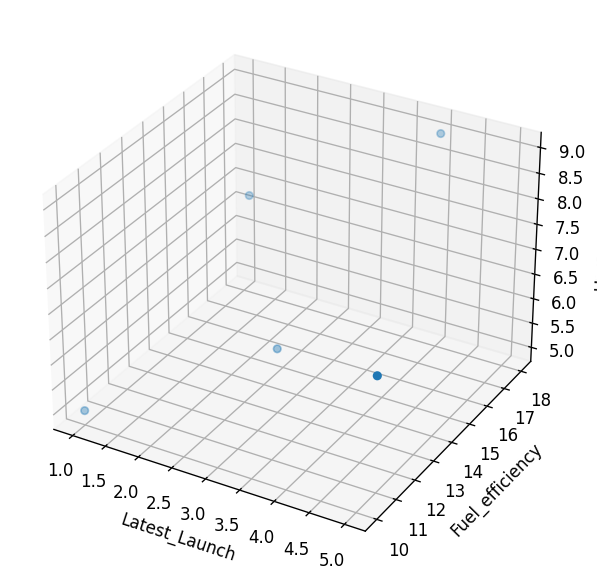

In [103]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize = (8, 6), dpi =  120)
a = fig.add_subplot(projection = '3d')
a.scatter(x, y, z, marker = 'o')
a.set_xlabel(vars[0])
a.set_ylabel(vars[1])
a.set_zlabel(vars[2])
plt.show()

